事件说明：
文档为2011年五月纽约市所有地铁客流量与天气状况的数据。对文档中的数据进行分析，分析不同天气状况，不同时间段内，不同地铁站，客流量的情况。

问题的提出与述求：
1.哪些因素影响地铁的客流量？
  --天气(雨天/雾天)、周末、节假日。
  --气温对客流量的影响。
2.哪个车站的乘客量最多？哪个最少？各车站之间客流量差异多大？
3.哪些时间段内地铁中的客流量最多？哪些时间段客流量最少？

In [1]:
#数据分析与处理：
#1.加载csv文档
import pandas as pd
import numpy as np

subway_df = pd.read_csv('nyc-subway-weather.csv')

预览数据，主要使用info、head、describe方法大致预览加载的数据

In [2]:
subway_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42649 entries, 0 to 42648
Data columns (total 27 columns):
UNIT               42649 non-null object
DATEn              42649 non-null object
TIMEn              42649 non-null object
ENTRIESn           42649 non-null int64
EXITSn             42649 non-null int64
ENTRIESn_hourly    42649 non-null float64
EXITSn_hourly      42649 non-null float64
datetime           42649 non-null object
hour               42649 non-null int64
day_week           42649 non-null int64
weekday            42649 non-null int64
station            42649 non-null object
latitude           42649 non-null float64
longitude          42649 non-null float64
conds              42649 non-null object
fog                42649 non-null int64
precipi            42649 non-null float64
pressurei          42649 non-null float64
rain               42649 non-null int64
tempi              42649 non-null float64
wspdi              42649 non-null float64
meanprecipi        42649 non-

In [3]:
subway_df.head()

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,05-01-11,00:00:00,4388333,2911002,0.0,0.0,2011-05-01 00:00:00,0,6,...,30.22,0,55.9,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
1,R003,05-01-11,04:00:00,4388333,2911002,0.0,0.0,2011-05-01 04:00:00,4,6,...,30.25,0,52.0,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
2,R003,05-01-11,12:00:00,4388333,2911002,0.0,0.0,2011-05-01 12:00:00,12,6,...,30.28,0,62.1,6.9,0.0,30.258,55.98,7.86,40.700348,-73.887177
3,R003,05-01-11,16:00:00,4388333,2911002,0.0,0.0,2011-05-01 16:00:00,16,6,...,30.26,0,57.9,15.0,0.0,30.258,55.98,7.86,40.700348,-73.887177
4,R003,05-01-11,20:00:00,4388333,2911002,0.0,0.0,2011-05-01 20:00:00,20,6,...,30.28,0,52.0,10.4,0.0,30.258,55.98,7.86,40.700348,-73.887177


In [4]:
subway_df.describe()

,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,hour,day_week,weekday,latitude,longitude,fog,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
count,4.264900e+04,4.264900e+04,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,...,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000
mean,2.812486e+07,1.986993e+07,1886.589955,1361.487866,10.046754,2.905719,0.714436,40.724647,-73.940364,0.009824,...,29.971096,0.224741,63.103780,6.927872,0.004618,29.971096,63.103780,6.927872,40.728555,-73.938693
std,3.043607e+07,2.028986e+07,2952.385585,2183.845409,6.938928,2.079231,0.451688,0.071650,0.059713,0.098631,...,0.137942,0.417417,8.455597,4.510178,0.016344,0.131158,6.939011,3.179832,0.065420,0.059582
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,40.576152,-74.073622,0.000000,...,29.550000,0.000000,46.900000,0.000000,0.000000,29.590000,49.400000,0.000000,40.600204,-74.014870
25%,1.039762e+07,7.613712e+06,274.000000,237.000000,4.000000,1.000000,0.000000,40.677107,-73.987342,0.000000,...,29.890000,0.000000,57.000000,4.600000,0.000000,29.913333,58.283333,4.816667,40.688591,-73.985130
50%,1.818389e+07,1.331609e+07,905.000000,664.000000,12.000000,3.000000,1.000000,40.717241,-73.953459,0.000000,...,29.960000,0.000000,61.000000,6.900000,0.000000,29.958000,60.950000,6.166667,40.720570,-73.949150
75%,3.263049e+07,2.393771e+07,2255.000000,1537.000000,16.000000,5.000000,1.000000,40.759123,-73.907733,0.000000,...,30.060000,0.000000,69.100000,9.200000,0.000000,30.060000,67.466667,8.850000,40.755226,-73.912033
max,2.357746e+08,1.493782e+08,32814.000000,34828.000000,20.000000,6.000000,1.000000,40.889185,-73.755383,1.000000,...,30.320000,1.000000,86.000000,23.000000,0.157500,30.293333,79.800000,17.083333,40.862064,-73.694176


从以上数据可以看出，文档中总共有27列，42649条数据，且每列没有数据却失的情况。

问题分析阶段：

In [5]:
#计算相关性--皮尔逊积矩相关系数 NumPy 的 corrcoef() 函数可用来计算皮尔逊积矩相关系数，也简称为“相关系数”。
def correlation(x,y):
    std_x = (x - x.mean())/x.std(ddof=0)
    std_y = (y - y.mean())/y.std(ddof=0)   
    
    return (std_x * std_y).mean()

In [6]:
#计算每小时入站人数‘ENTRIESn_hourly’与当天平均降水量‘meanprecipi’的相关性
correlation(subway_df['ENTRIESn_hourly'],subway_df['meanprecipi'])

0.03564851577223041

结果为正数0.0356，说明每小时的入站人数与降水量成正相关，即：降水量大，入站人数多，但是值很小，说明两者的相关度不是很高。

In [7]:
#计算每小时入站人数‘ENTRIESn_hourly’与每小时增加的乘坐地铁的人数‘ENTRIESn’的相关性
correlation(subway_df['ENTRIESn_hourly'],subway_df['ENTRIESn'])

0.5858954707662182

结果为正数0.586，说明两者成正相关。两者的相关度较高，但相比于最大值1还有差距。

In [23]:
entries_and_exits = pd.DataFrame({
    'ENTRIESn':subway_df['ENTRIESn'],
    'EXITSn':subway_df['EXITSn']
})

In [16]:
#得到每小时的地铁进出人数
def get_hourly_entries_and_exits(entries_and_exits):
    hourly_entries_and_exits = entries_and_exits - entries_and_exits.shift(1)
    return hourly_entries_and_exits

In [25]:
get_hourly_entries_and_exits(entries_and_exits)

,ENTRIESn,EXITSn
0,NaN,NaN
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
5,15.0,34.0
6,1430341.0,963731.0
7,-1429834.0,-963573.0
8,490.0,132.0
9,231.0,232.0


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
#获得地铁站每天每小时的平均客流量
subway_df_data = subway_df.groupby('DATEn')
print (subway_df_data.mean()['ENTRIESn_hourly'])

DATEn
05-01-11    1148.929464
05-02-11    2022.293948
05-03-11    2262.351102
05-04-11    2268.301818
05-05-11    2313.088937
05-06-11    2315.391114
05-07-11    1402.199403
05-08-11    1051.124625
05-09-11    2030.648281
05-10-11    2200.917379
05-11-11    2344.002959
05-12-11    2382.321429
05-13-11    2322.863535
05-14-11    1415.087602
05-15-11    1043.490037
05-16-11    2025.934982
05-17-11    2139.860974
05-18-11    2281.300872
05-19-11    2280.942545
05-20-11    2275.366764
05-21-11    1439.299414
05-22-11    1041.046921
05-23-11    2043.400568
05-24-11    2177.435060
05-25-11    2295.586657
05-26-11    2293.567607
05-27-11    2196.741606
05-28-11    1279.201767
05-29-11    1047.161385
05-30-11    1004.684248
05-31-11    2043.768137
Name: ENTRIESn_hourly, dtype: float64


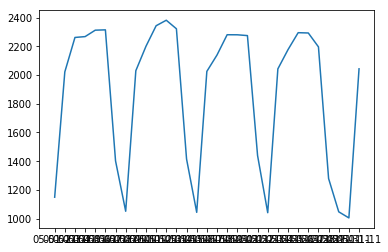

In [42]:
plt.plot(subway_df_data.mean()['ENTRIESn_hourly'])

从图中可以看出，平均每天每小时的客流量为1000-2400

In [44]:
#计算一周每天的平均客流量
subway_df.groupby('day_week').mean()

,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,hour,weekday,latitude,longitude,fog,precipi,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
day_week,,,,,,,,,,,,,,,,,,,,
0,2.840276e+07,2.006446e+07,1825.264907,1304.046505,10.012553,1.0,40.724701,-73.940259,0.000000,0.000595,29.993017,0.212268,62.584665,7.934180,0.000595,29.993017,62.584665,7.934180,40.728668,-73.938591
1,2.846201e+07,2.013426e+07,2164.836433,1537.704955,9.959392,1.0,40.724725,-73.940213,0.006673,0.014065,29.978990,0.201193,65.760642,8.365128,0.014065,29.978990,65.760642,8.365128,40.728664,-73.938464
2,2.759311e+07,1.954360e+07,2297.097957,1637.824152,10.059103,1.0,40.724626,-73.940252,0.038672,0.010773,29.973333,0.499818,61.456348,7.767858,0.010773,29.973333,61.456348,7.767858,40.728592,-73.938707
3,2.774932e+07,1.959388e+07,2317.072379,1638.763537,10.056518,1.0,40.724578,-73.940469,0.004376,0.001696,29.976963,0.163537,62.110100,7.552944,0.001696,29.976963,62.110100,7.552944,40.728496,-73.938749
4,2.798019e+07,1.972139e+07,2277.372294,1621.136514,10.052110,1.0,40.724469,-73.940258,0.000000,0.000857,29.945215,0.249174,62.636899,4.773413,0.000857,29.945215,62.636899,4.773413,40.728321,-73.938448
5,2.809505e+07,1.984991e+07,1383.901479,1052.769316,10.107209,0.0,40.724769,-73.940675,0.000000,0.000000,29.912752,0.061368,64.529593,5.297283,0.000000,29.912752,64.529593,5.297283,40.728610,-73.939098
6,2.836150e+07,2.001703e+07,1066.436106,826.832324,10.102526,0.0,40.724631,-73.940473,0.020092,0.003055,30.001086,0.199882,62.252711,6.241380,0.003055,30.001086,62.252711,6.241380,40.728488,-73.938856


In [47]:
#计算一周每天平均每小时的客流量
ridership_by_day = subway_df.groupby('day_week').mean()['ENTRIESn_hourly']
print (ridership_by_day)

day_week
0    1825.264907
1    2164.836433
2    2297.097957
3    2317.072379
4    2277.372294
5    1383.901479
6    1066.436106
Name: ENTRIESn_hourly, dtype: float64


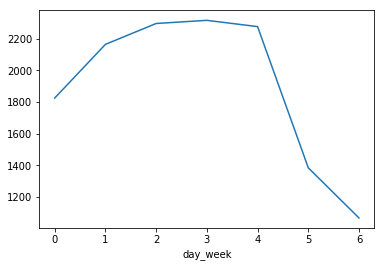

In [48]:
ridership_by_day.plot()

从图中可以看出每周每天每小时的平均客流量为1000-2300，跟之前计算的每月每天每小时的平均客流量基本吻合。且day_week为5和6，即：周六周日期间，平均每小时的客流量最少。

In [49]:
def get_diff(df):
    return df.diff()

In [50]:
def get_hourly_entries_and_exits(entries_and_exits):
    group_data = entries_and_exits.groupby('UNIT')['ENTRIESn','EXITSn'].apply(get_diff)
    return group_data

In [51]:
ridership_df = pd.DataFrame({
    'UNIT': subway_df['UNIT'],
    'TIMEn': subway_df['TIMEn'],
    'ENTRIESn': subway_df['ENTRIESn'],
    'EXITSn': subway_df['EXITSn']
})

In [52]:
get_hourly_entries_and_exits(ridership_df)

,ENTRIESn,EXITSn
0,NaN,NaN
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
5,15.0,34.0
6,1430341.0,963731.0
7,-1429834.0,-963573.0
8,490.0,132.0
9,231.0,232.0


In [53]:
#获取雨天与乘客量的关系 0-不下雨 1-下雨
ridership_by_rain = subway_df.groupby('rain',as_index=False).mean()['ENTRIESn_hourly']

In [54]:
print (ridership_by_rain)

0    1845.539439
1    2028.196035
Name: ENTRIESn_hourly, dtype: float64


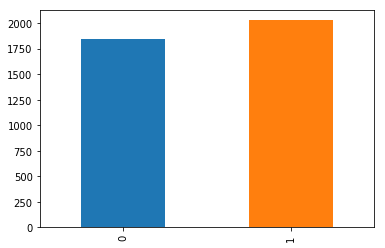

In [55]:
#雨天和晴天平均地铁客流量直方图
ridership_by_rain.plot(kind='bar')

从图中可以看出，雨天(1)地铁客流量比晴天要多。符合实际情况。

In [67]:
#获取雾天与乘客量的关系 0-没雾 1-有雾
ridership_by_fog = subway_df.groupby('fog',as_index=False).mean()['ENTRIESn_hourly']
print (ridership_by_fog)

0    1889.116150
1    1631.980907
Name: ENTRIESn_hourly, dtype: float64


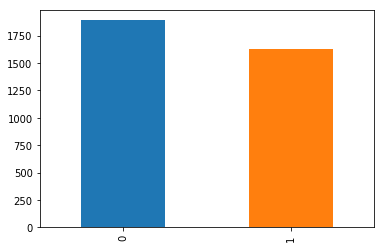

In [68]:
ridership_by_fog.plot(kind='bar')

In [103]:
#获取气温与乘客量的关系 
ridership_by_temp = subway_df.groupby('tempi',as_index=False).mean()
x_axis = ridership_by_temp['tempi']
y_axis = ridership_by_temp['ENTRIESn_hourly']

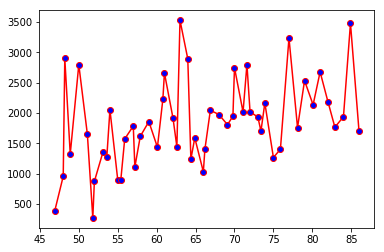

In [87]:
plt.plot(x_axis,y_axis,color='r',markerfacecolor='blue',marker='o')

In [56]:
#获取不同位置的平均客流量
data_by_location = subway_df.groupby(['latitude','longitude'],as_index=False).mean()

In [59]:
data_by_location.head()['latitude']

0    40.576152
1    40.576298
2    40.577961
3    40.589547
4    40.590867
Name: latitude, dtype: float64

In [61]:
scaled_entries = data_by_location['ENTRIESn_hourly'] /data_by_location['ENTRIESn_hourly'].std()

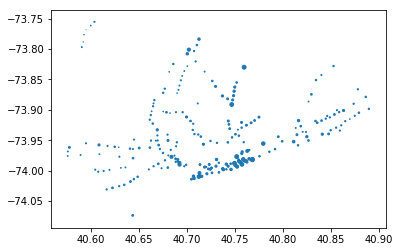

In [63]:
#以经纬度作为 x 和 y 轴、客流量作为气泡大小的地铁站散点图
plt.scatter(data_by_location['latitude'],data_by_location['longitude'],s=scaled_entries*3)

图中气泡越大的地方表明客流量越多